In [2]:
import pandas as pd
telemetry=pd.read_csv('/Users/cra/Downloads/Motorq Data Science Assignment/telemetry_data.csv')
triggers=pd.read_csv('/Users/cra/Downloads/Motorq Data Science Assignment/triggers_soc.csv')
vehicle_pnid=pd.read_csv('/Users/cra/Downloads/Motorq Data Science Assignment/vehicle_pnid_mapping.csv')
artificial=pd.read_json('/Users/cra/Downloads/Motorq Data Science Assignment/artificial_ign_off_data.json')

# ANALYSIS

Too many null values for the following columns . Since the exercise was about ignition state. Null values in the Ignition column were dropped . There wasn't much data about vehicle and pnid mapping...many pnids were not mapped to a vehicle. Timestamp wasn't given the datetime format. 

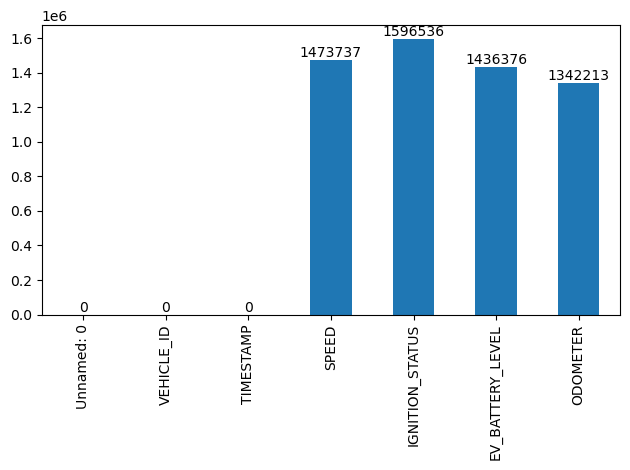

In [3]:
import matplotlib.pyplot as plt
ax=telemetry.isnull().sum().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", xytext=(0, 5), textcoords="offset points")

plt.tight_layout()
plt.show()

# NULL VALUES

Timestamp was converted to datetime format for better processing

In [40]:
from dateutil import parser
def change(timestamp_str):
    timestamp_str=str(timestamp_str)
    timestamp_obj = parser.parse(timestamp_str)
    formatted_timestamp = timestamp_obj.strftime('%Y-%m-%d %H:%M:%S')
    return formatted_timestamp
main=pd.read_csv('/Users/cra/Downloads/Motorq Data Science Assignment/telemetry_data.csv')
main

,Unnamed: 0,VEHICLE_ID,TIMESTAMP,SPEED,IGNITION_STATUS,EV_BATTERY_LEVEL,ODOMETER
0,0,66bd55df-eaf0-49c8-b9e1-7759b85e9325,2021-09-23 01:45:42.018,NaN,NaN,NaN,NaN
1,1,66bd55df-eaf0-49c8-b9e1-7759b85e9325,2021-09-23 01:58:08.017,NaN,NaN,NaN,NaN
2,2,66bd55df-eaf0-49c8-b9e1-7759b85e9325,2021-09-23 01:57:02.031,NaN,NaN,NaN,38685.9
3,3,66bd55df-eaf0-49c8-b9e1-7759b85e9325,2021-09-23 01:38:57.002,0.0,on,NaN,NaN
4,4,66bd55df-eaf0-49c8-b9e1-7759b85e9325,2021-09-23 02:00:05.004,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1823547,749582,ef67f6d6-196a-4bc0-94fa-c13ad9672dac,2023-01-21 03:11:40.400000,NaN,NaN,NaN,NaN
1823548,749583,ef67f6d6-196a-4bc0-94fa-c13ad9672dac,2023-01-21 03:11:41.014000,NaN,NaN,NaN,NaN
1823549,749584,ef67f6d6-196a-4bc0-94fa-c13ad9672dac,2023-01-21 03:11:42.500000,NaN,NaN,NaN,32072.7
1823550,749585,ef67f6d6-196a-4bc0-94fa-c13ad9672dac,2023-01-21 03:12:00.021000,NaN,NaN,57.6,NaN


In [4]:
telemetry.describe()

,Unnamed: 0,SPEED,EV_BATTERY_LEVEL,ODOMETER
count,1.823552e+06,349815.000000,387176.000000,481339.000000
mean,4.703128e+05,19.279932,59.470183,46794.767610
std,2.867447e+05,22.518583,20.021499,19695.777206
min,0.000000e+00,0.000000,0.000000,10645.000000
25%,2.279438e+05,0.000000,45.800000,36416.700000
50%,4.558875e+05,10.600000,61.100000,43200.600000
75%,6.838312e+05,31.000000,74.100000,49710.100000
max,1.073964e+06,101.000000,110.000000,105908.500000


In [6]:
telemetry.dropna(subset=['IGNITION_STATUS'], inplace=True)


# 1 A

In [7]:
import pandas as pd
import numpy as np
from dateutil import parser

def change(timestamp_str):
    timestamp_str=str(timestamp_str)
    timestamp_obj = parser.parse(timestamp_str)
    formatted_timestamp = timestamp_obj.strftime('%Y-%m-%d %H:%M:%S')
    return formatted_timestamp

ignition_events = pd.DataFrame()

ignition_events['vehicle_id'] = telemetry['VEHICLE_ID']
ignition_events['Event'] = np.where((telemetry['IGNITION_STATUS'] == 'on'), 'IgnitionOn', 'IgnitionOff')
ignition_events['timestamp'] = telemetry['TIMESTAMP'].apply(change)

print(ignition_events)


                                   vehicle_id        Event  \
3        66bd55df-eaf0-49c8-b9e1-7759b85e9325   IgnitionOn   
11       66bd55df-eaf0-49c8-b9e1-7759b85e9325   IgnitionOn   
13       66bd55df-eaf0-49c8-b9e1-7759b85e9325   IgnitionOn   
20       66bd55df-eaf0-49c8-b9e1-7759b85e9325   IgnitionOn   
44       66bd55df-eaf0-49c8-b9e1-7759b85e9325   IgnitionOn   
...                                       ...          ...   
1823497  ef67f6d6-196a-4bc0-94fa-c13ad9672dac   IgnitionOn   
1823506  ef67f6d6-196a-4bc0-94fa-c13ad9672dac   IgnitionOn   
1823526  ef67f6d6-196a-4bc0-94fa-c13ad9672dac   IgnitionOn   
1823539  ef67f6d6-196a-4bc0-94fa-c13ad9672dac  IgnitionOff   
1823540  ef67f6d6-196a-4bc0-94fa-c13ad9672dac  IgnitionOff   

                   timestamp  
3        2021-09-23 01:38:57  
11       2021-09-23 02:11:29  
13       2021-09-23 01:42:02  
20       2021-09-23 01:51:20  
44       2021-09-23 01:58:03  
...                      ...  
1823497  2023-01-21 03:10:21  
1823506

In [12]:
vehicle_pnid=vehicle_pnid.dropna(subset=['IDS'])

# 1 B

In [13]:
triggers['PNID'].unique()

array([206958332, 256832791, 256782425, 255506821, 266214265, 258703729,
       207925262, 207925484, 265888189, 258754391, 270129825, 270768911,
       258756325, 186776160, 193290358, 187360712, 187373626, 187373670,
       187373662, 264921353])

In [14]:
df=triggers[triggers['NAME']=='IGN_CYL']
df

def find_vehicle_id(pnid):
    pnid=str(pnid)
    matching_row = vehicle_pnid[vehicle_pnid['IDS'].str.contains(pnid)]
    if not matching_row.empty:
        return matching_row.iloc[0]['ID']
    else:
        return None

b_table=pd.DataFrame()
b_table['vehicle_id']=df['PNID'].apply(find_vehicle_id)
b_table['timestamp']=df['CTS'].apply(change)
b_table['Event']=np.where(df['VAL']=='ON','IgnitionOn','IgnitionOff')


b_table

,vehicle_id,timestamp,Event
0,None,2021-12-01 17:58:27,IgnitionOff
1,None,2021-12-01 17:58:27,IgnitionOff
2,None,2021-12-01 17:56:24,IgnitionOn
4,None,2021-12-01 17:56:24,IgnitionOn
6,9893c80d-f282-46cf-a794-280f0306c936,2021-12-01 19:26:58,IgnitionOn
...,...,...,...
68662,None,2022-01-28 20:36:42,IgnitionOff
68664,None,2022-01-28 20:45:07,IgnitionOff
68665,None,2022-01-28 20:45:07,IgnitionOff
68666,None,2022-01-28 20:45:52,IgnitionOn


In [15]:
b_table=b_table.dropna(subset=['vehicle_id'])
b_table

,vehicle_id,timestamp,Event
6,9893c80d-f282-46cf-a794-280f0306c936,2021-12-01 19:26:58,IgnitionOn
9,66bd55df-eaf0-49c8-b9e1-7759b85e9325,2021-12-01 19:42:39,IgnitionOn
11,66bd55df-eaf0-49c8-b9e1-7759b85e9325,2021-12-01 19:56:01,IgnitionOff
13,66bd55df-eaf0-49c8-b9e1-7759b85e9325,2021-12-01 19:56:08,IgnitionOn
15,66bd55df-eaf0-49c8-b9e1-7759b85e9325,2021-12-01 19:56:34,IgnitionOff
...,...,...,...
68608,d44b765e-d86f-46f8-ba46-8cd913c49285,2022-01-28 20:48:46,IgnitionOn
68610,9893c80d-f282-46cf-a794-280f0306c936,2022-01-28 20:49:41,IgnitionOn
68612,9893c80d-f282-46cf-a794-280f0306c936,2022-01-28 20:49:41,IgnitionOn
68640,66bd55df-eaf0-49c8-b9e1-7759b85e9325,2022-01-28 21:11:22,IgnitionOn


In [16]:
vehicle_pnid=vehicle_pnid.dropna(subset=['IDS'])
vehicle_pnid

,Unnamed: 0,ID,IDS
0,0,66bd55df-eaf0-49c8-b9e1-7759b85e9325,"[\n ""256932585"",\n ""256932577"",\n ""25693258..."
3,3,fc86bd41-dd55-4d15-bb3f-35e31c7759e6,"[\n ""270199389"",\n ""270199393"",\n ""27019938..."
4,0,9893c80d-f282-46cf-a794-280f0306c936,"[\n ""256933093"",\n ""256933081"",\n ""25693308..."
5,1,56d8ca94-9b18-41d1-831f-7afd905326d4,"[\n ""331750017"",\n ""331750025"",\n ""33175002..."
10,6,3bb48ce7-bb7e-4b4f-b902-b0561e1cd2e0,"[\n ""250407798"",\n ""250407790"",\n ""25040779..."
11,7,cefc7df0-cf57-46ab-8180-55d437e07d9f,"[\n ""255130900"",\n ""255130908"",\n ""25513090..."
12,8,d44b765e-d86f-46f8-ba46-8cd913c49285,"[\n ""197443154"",\n ""197443158"",\n ""19744316..."
13,9,fc86bd41-dd55-4d15-bb3f-35e31c7759e6,"[\n ""270199389"",\n ""270199393"",\n ""27019938..."
14,10,9eb5ac45-bbf9-4a07-83d8-044372f336c7,"[\n ""255131120"",\n ""255131128"",\n ""25513113..."
15,11,ef67f6d6-196a-4bc0-94fa-c13ad9672dac,"[\n ""331750427"",\n ""331750431"",\n ""33175042..."


# 1 C

In [17]:
artificial

,vehicleId,timestamp,type
0,3e937810-3a3b-48d6-80ad-56ae12c3bed8,2022-01-31 19:13:06.001000+00:00,artificial_event
1,3e937810-3a3b-48d6-80ad-56ae12c3bed8,2022-01-31 04:25:05.011000+00:00,artificial_event
2,460a67ab-ee58-4279-b96d-ac56ac029d3e,2022-01-30 01:58:57.004000+00:00,artificial_event
3,9893c80d-f282-46cf-a794-280f0306c936,2022-01-30 21:43:42.027000+00:00,artificial_event
4,fb20e847-d2a1-4583-b874-393c9d1f3db9,2022-01-31 04:25:05.038000+00:00,artificial_event
...,...,...,...
406,f0704100-56e6-4117-ae4f-cf97e5d2d132,2021-12-19 07:32:14.004000+00:00,artificial_event
407,fb20e847-d2a1-4583-b874-393c9d1f3db9,2021-12-19 05:54:05.037000+00:00,artificial_event
408,fb20e847-d2a1-4583-b874-393c9d1f3db9,2021-12-19 04:10:51.041000+00:00,artificial_event
409,460a67ab-ee58-4279-b96d-ac56ac029d3e,2021-12-18 22:45:17.030000+00:00,artificial_event


In [19]:
def change(timestamp_str):
    timestamp_str=str(timestamp_str)
    timestamp_obj = parser.parse(timestamp_str)
    formatted_timestamp = timestamp_obj.strftime('%Y-%m-%d %H:%M:%S')
    return formatted_timestamp
c_table=pd.DataFrame()
c_table['vehicle_id']=artificial['vehicleId']
c_table['timestamp']=artificial['timestamp'].apply(change)
c_table['Event']='ignitionOff'






In [20]:
ignition_events['vehicle_id'].isnull().sum()

0

In [21]:
concatenated_data = pd.concat([ignition_events, b_table])

concatenated_data = concatenated_data.reset_index(drop=True)

print(concatenated_data)

                                  vehicle_id       Event            timestamp
0       66bd55df-eaf0-49c8-b9e1-7759b85e9325  IgnitionOn  2021-09-23 01:38:57
1       66bd55df-eaf0-49c8-b9e1-7759b85e9325  IgnitionOn  2021-09-23 02:11:29
2       66bd55df-eaf0-49c8-b9e1-7759b85e9325  IgnitionOn  2021-09-23 01:42:02
3       66bd55df-eaf0-49c8-b9e1-7759b85e9325  IgnitionOn  2021-09-23 01:51:20
4       66bd55df-eaf0-49c8-b9e1-7759b85e9325  IgnitionOn  2021-09-23 01:58:03
...                                      ...         ...                  ...
236860  d44b765e-d86f-46f8-ba46-8cd913c49285  IgnitionOn  2022-01-28 20:48:46
236861  9893c80d-f282-46cf-a794-280f0306c936  IgnitionOn  2022-01-28 20:49:41
236862  9893c80d-f282-46cf-a794-280f0306c936  IgnitionOn  2022-01-28 20:49:41
236863  66bd55df-eaf0-49c8-b9e1-7759b85e9325  IgnitionOn  2022-01-28 21:11:22
236864  66bd55df-eaf0-49c8-b9e1-7759b85e9325  IgnitionOn  2022-01-28 21:11:22

[236865 rows x 3 columns]


In [22]:
ignition_events_final = pd.concat([concatenated_data, c_table])


ignition_events_final = ignition_events_final.reset_index(drop=True)

print(ignition_events_final)

                                  vehicle_id        Event            timestamp
0       66bd55df-eaf0-49c8-b9e1-7759b85e9325   IgnitionOn  2021-09-23 01:38:57
1       66bd55df-eaf0-49c8-b9e1-7759b85e9325   IgnitionOn  2021-09-23 02:11:29
2       66bd55df-eaf0-49c8-b9e1-7759b85e9325   IgnitionOn  2021-09-23 01:42:02
3       66bd55df-eaf0-49c8-b9e1-7759b85e9325   IgnitionOn  2021-09-23 01:51:20
4       66bd55df-eaf0-49c8-b9e1-7759b85e9325   IgnitionOn  2021-09-23 01:58:03
...                                      ...          ...                  ...
237271  f0704100-56e6-4117-ae4f-cf97e5d2d132  ignitionOff  2021-12-19 07:32:14
237272  fb20e847-d2a1-4583-b874-393c9d1f3db9  ignitionOff  2021-12-19 05:54:05
237273  fb20e847-d2a1-4583-b874-393c9d1f3db9  ignitionOff  2021-12-19 04:10:51
237274  460a67ab-ee58-4279-b96d-ac56ac029d3e  ignitionOff  2021-12-18 22:45:17
237275  3e937810-3a3b-48d6-80ad-56ae12c3bed8  ignitionOff  2021-12-18 18:53:37

[237276 rows x 3 columns]


# 2

In [ ]:
triggers['NAME'].unique()

array(['IGN_CYL', 'CHARGE_STATE', 'EV_CHARGE_STATE'], dtype=object)

In [25]:
df2=triggers[triggers['NAME']=='EV_CHARGE_STATE']
df2

,Unnamed: 0,CTS,PNID,NAME,VAL
8,8,2021-12-01 19:57:32 IST+0530,256782425,EV_CHARGE_STATE,Active
16,16,2021-12-06 22:43:33 IST+0530,256782425,EV_CHARGE_STATE,Aborted
82,82,2021-12-07 01:49:27 IST+0530,256782425,EV_CHARGE_STATE,Aborted
84,84,2021-12-07 01:49:57 IST+0530,256782425,EV_CHARGE_STATE,Aborted
91,91,2021-12-07 01:58:59 IST+0530,258703729,EV_CHARGE_STATE,Aborted
...,...,...,...,...,...
68589,68589,2022-01-28 21:09:02 IST+0530,256782425,EV_CHARGE_STATE,Aborted
68614,68614,2022-01-28 20:30:37 IST+0530,207925262,EV_CHARGE_STATE,Aborted
68615,68615,2022-01-28 20:30:37 IST+0530,207925262,EV_CHARGE_STATE,Aborted
68630,68630,2022-01-28 20:30:37 IST+0530,207925262,EV_CHARGE_STATE,Aborted


In [26]:
charge_state=pd.DataFrame()
charge_state['vehicle_id']=df2['PNID'].apply(find_vehicle_id)
charge_state['Event']=df2['VAL']
charge_state['timestamp']=df2['CTS'].apply(change)

charge_state=charge_state.dropna(subset=['vehicle_id'])
charge_state

,vehicle_id,Event,timestamp
8,66bd55df-eaf0-49c8-b9e1-7759b85e9325,Active,2021-12-01 19:57:32
16,66bd55df-eaf0-49c8-b9e1-7759b85e9325,Aborted,2021-12-06 22:43:33
82,66bd55df-eaf0-49c8-b9e1-7759b85e9325,Aborted,2021-12-07 01:49:27
84,66bd55df-eaf0-49c8-b9e1-7759b85e9325,Aborted,2021-12-07 01:49:57
107,66bd55df-eaf0-49c8-b9e1-7759b85e9325,Aborted,2021-12-07 02:03:32
...,...,...,...
68477,fc86bd41-dd55-4d15-bb3f-35e31c7759e6,Active,2022-01-21 06:45:03
68574,66bd55df-eaf0-49c8-b9e1-7759b85e9325,Active,2022-01-28 20:08:30
68575,66bd55df-eaf0-49c8-b9e1-7759b85e9325,Active,2022-01-28 20:08:30
68588,66bd55df-eaf0-49c8-b9e1-7759b85e9325,Aborted,2022-01-28 21:09:02


# 3


In [27]:
final = pd.concat([ignition_events_final,charge_state])


final = final.reset_index(drop=True)

print(final)

                                  vehicle_id       Event            timestamp
0       66bd55df-eaf0-49c8-b9e1-7759b85e9325  IgnitionOn  2021-09-23 01:38:57
1       66bd55df-eaf0-49c8-b9e1-7759b85e9325  IgnitionOn  2021-09-23 02:11:29
2       66bd55df-eaf0-49c8-b9e1-7759b85e9325  IgnitionOn  2021-09-23 01:42:02
3       66bd55df-eaf0-49c8-b9e1-7759b85e9325  IgnitionOn  2021-09-23 01:51:20
4       66bd55df-eaf0-49c8-b9e1-7759b85e9325  IgnitionOn  2021-09-23 01:58:03
...                                      ...         ...                  ...
239941  fc86bd41-dd55-4d15-bb3f-35e31c7759e6      Active  2022-01-21 06:45:03
239942  66bd55df-eaf0-49c8-b9e1-7759b85e9325      Active  2022-01-28 20:08:30
239943  66bd55df-eaf0-49c8-b9e1-7759b85e9325      Active  2022-01-28 20:08:30
239944  66bd55df-eaf0-49c8-b9e1-7759b85e9325     Aborted  2022-01-28 21:09:02
239945  66bd55df-eaf0-49c8-b9e1-7759b85e9325     Aborted  2022-01-28 21:09:02

[239946 rows x 3 columns]


# 4a

In [28]:
telemetry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227016 entries, 3 to 1823540
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        227016 non-null  int64  
 1   VEHICLE_ID        227016 non-null  object 
 2   TIMESTAMP         227016 non-null  object 
 3   SPEED             221513 non-null  float64
 4   IGNITION_STATUS   227016 non-null  object 
 5   EV_BATTERY_LEVEL  146 non-null     float64
 6   ODOMETER          15 non-null      float64
dtypes: float64(3), int64(1), object(3)
memory usage: 13.9+ MB


In [29]:
df3=triggers[triggers['NAME']=='CHARGE_STATE']
df3

,Unnamed: 0,CTS,PNID,NAME,VAL
3,3,2021-12-01 17:56:24 IST+0530,206958332,CHARGE_STATE,50.1
5,5,2021-12-01 17:56:24 IST+0530,206958332,CHARGE_STATE,50.1
7,7,2021-12-01 19:27:01 IST+0530,256832791,CHARGE_STATE,73.3
10,10,2021-12-01 19:42:40 IST+0530,256782425,CHARGE_STATE,56.4
12,12,2021-12-01 19:56:07 IST+0530,256782425,CHARGE_STATE,47.4
...,...,...,...,...,...
68659,68659,2022-01-28 20:51:12 IST+0530,207925262,CHARGE_STATE,47.8
68661,68661,2022-01-28 20:36:44 IST+0530,207925262,CHARGE_STATE,49.0
68663,68663,2022-01-28 20:36:44 IST+0530,207925262,CHARGE_STATE,49.0
68667,68667,2022-01-28 20:45:52 IST+0530,207925262,CHARGE_STATE,49.0


In [30]:
telemetry

,Unnamed: 0,VEHICLE_ID,TIMESTAMP,SPEED,IGNITION_STATUS,EV_BATTERY_LEVEL,ODOMETER
3,3,66bd55df-eaf0-49c8-b9e1-7759b85e9325,2021-09-23 01:38:57.002,0.0,on,NaN,NaN
11,11,66bd55df-eaf0-49c8-b9e1-7759b85e9325,2021-09-23 02:11:29.002,5.0,on,NaN,NaN
13,13,66bd55df-eaf0-49c8-b9e1-7759b85e9325,2021-09-23 01:42:02.015,26.7,on,NaN,NaN
20,20,66bd55df-eaf0-49c8-b9e1-7759b85e9325,2021-09-23 01:51:20.002,26.7,on,NaN,NaN
44,44,66bd55df-eaf0-49c8-b9e1-7759b85e9325,2021-09-23 01:58:03.011,0.0,on,NaN,NaN
...,...,...,...,...,...,...,...
1823497,749532,ef67f6d6-196a-4bc0-94fa-c13ad9672dac,2023-01-21 03:10:21.020000,23.0,on,NaN,NaN
1823506,749541,ef67f6d6-196a-4bc0-94fa-c13ad9672dac,2023-01-21 03:10:52.029000,21.7,on,NaN,NaN
1823526,749561,ef67f6d6-196a-4bc0-94fa-c13ad9672dac,2023-01-21 03:11:23.002000,0.0,on,NaN,NaN
1823539,749574,ef67f6d6-196a-4bc0-94fa-c13ad9672dac,2023-01-21 03:11:34.011000,0.0,off,NaN,NaN


In [31]:
final['battery level']=telemetry['EV_BATTERY_LEVEL']


updating battery levels for vehicle ids given in the telemetry table

In [32]:
final

,vehicle_id,Event,timestamp,battery level
0,66bd55df-eaf0-49c8-b9e1-7759b85e9325,IgnitionOn,2021-09-23 01:38:57,NaN
1,66bd55df-eaf0-49c8-b9e1-7759b85e9325,IgnitionOn,2021-09-23 02:11:29,NaN
2,66bd55df-eaf0-49c8-b9e1-7759b85e9325,IgnitionOn,2021-09-23 01:42:02,NaN
3,66bd55df-eaf0-49c8-b9e1-7759b85e9325,IgnitionOn,2021-09-23 01:51:20,NaN
4,66bd55df-eaf0-49c8-b9e1-7759b85e9325,IgnitionOn,2021-09-23 01:58:03,NaN
...,...,...,...,...
239941,fc86bd41-dd55-4d15-bb3f-35e31c7759e6,Active,2022-01-21 06:45:03,NaN
239942,66bd55df-eaf0-49c8-b9e1-7759b85e9325,Active,2022-01-28 20:08:30,NaN
239943,66bd55df-eaf0-49c8-b9e1-7759b85e9325,Active,2022-01-28 20:08:30,NaN
239944,66bd55df-eaf0-49c8-b9e1-7759b85e9325,Aborted,2022-01-28 21:09:02,NaN


updating battery levels for vehicle ids from the trigger table . Accessing the vehicle ids by pnids.

In [33]:
for i,row in df3.iterrows():
    v=find_vehicle_id(row[2])
    time=change(row[1])
    if v!=None:
        final.loc[(final['vehicle_id'] == v) & (final['timestamp'] == time), 'battery level'] = row[4]

final
        

,vehicle_id,Event,timestamp,battery level
0,66bd55df-eaf0-49c8-b9e1-7759b85e9325,IgnitionOn,2021-09-23 01:38:57,NaN
1,66bd55df-eaf0-49c8-b9e1-7759b85e9325,IgnitionOn,2021-09-23 02:11:29,NaN
2,66bd55df-eaf0-49c8-b9e1-7759b85e9325,IgnitionOn,2021-09-23 01:42:02,NaN
3,66bd55df-eaf0-49c8-b9e1-7759b85e9325,IgnitionOn,2021-09-23 01:51:20,NaN
4,66bd55df-eaf0-49c8-b9e1-7759b85e9325,IgnitionOn,2021-09-23 01:58:03,NaN
...,...,...,...,...
239941,fc86bd41-dd55-4d15-bb3f-35e31c7759e6,Active,2022-01-21 06:45:03,NaN
239942,66bd55df-eaf0-49c8-b9e1-7759b85e9325,Active,2022-01-28 20:08:30,NaN
239943,66bd55df-eaf0-49c8-b9e1-7759b85e9325,Active,2022-01-28 20:08:30,NaN
239944,66bd55df-eaf0-49c8-b9e1-7759b85e9325,Aborted,2022-01-28 21:09:02,NaN


In [41]:
final['battery level'].unique()

array([nan, 106.0, '37.2', 103.0, 110.0, 107.0, 109.0, '82.3', '63.5',
       '45.4', 108.0, '70.5', '69.0', '47.8', '78.4', '57.6', '83.5',
       '77.2', '67.0', '69.8', '43.1', '57.2', '79.2', '38.8', '80.0',
       105.0, '33.3', 104.0, '45.0', '60.7', '81.9', '43.5', '73.7',
       '71.3', 102.0, '46.2', '76.4', '77.6', '61.5', 101.0, '52.1',
       '59.6', '84.3', '40.0', '30.9', '79.6', '80.3', '63.1', '67.8',
       '38.0', '36.8', '68.6', '73.3', '69.4', '75.2', '28.2', '56.4',
       '72.5', '74.5', '87.8', '100.0', '91.3', '74.1', '70.9', '62.7',
       '54.9', '76.8', '50.5', '86.2', '75.6', '54.1', '50.9', '40.7',
       '78.8', '35.2', '61.1', '65.4', '37.6', '96.8', '88.2', '32.1',
       '68.2', '70.1', '23.9', '58.8', '74.9', '64.7', '51.3', '72.1',
       '43.9', '59.2', '76.0', '66.6', '35.6', '39.2', '17.6', '89.8',
       '90.1', '34.1', '28.6', '63.9', '29.4', '66.2', '52.5', '67.4',
       '60.0', '62.3', '60.3', '71.7', '82.7', '87.4', '83.9', '86.6',
       '40

In [35]:
df3

,Unnamed: 0,CTS,PNID,NAME,VAL
3,3,2021-12-01 17:56:24 IST+0530,206958332,CHARGE_STATE,50.1
5,5,2021-12-01 17:56:24 IST+0530,206958332,CHARGE_STATE,50.1
7,7,2021-12-01 19:27:01 IST+0530,256832791,CHARGE_STATE,73.3
10,10,2021-12-01 19:42:40 IST+0530,256782425,CHARGE_STATE,56.4
12,12,2021-12-01 19:56:07 IST+0530,256782425,CHARGE_STATE,47.4
...,...,...,...,...,...
68659,68659,2022-01-28 20:51:12 IST+0530,207925262,CHARGE_STATE,47.8
68661,68661,2022-01-28 20:36:44 IST+0530,207925262,CHARGE_STATE,49.0
68663,68663,2022-01-28 20:36:44 IST+0530,207925262,CHARGE_STATE,49.0
68667,68667,2022-01-28 20:45:52 IST+0530,207925262,CHARGE_STATE,49.0


In [36]:
final

,vehicle_id,Event,timestamp,battery level
0,66bd55df-eaf0-49c8-b9e1-7759b85e9325,IgnitionOn,2021-09-23 01:38:57,NaN
1,66bd55df-eaf0-49c8-b9e1-7759b85e9325,IgnitionOn,2021-09-23 02:11:29,NaN
2,66bd55df-eaf0-49c8-b9e1-7759b85e9325,IgnitionOn,2021-09-23 01:42:02,NaN
3,66bd55df-eaf0-49c8-b9e1-7759b85e9325,IgnitionOn,2021-09-23 01:51:20,NaN
4,66bd55df-eaf0-49c8-b9e1-7759b85e9325,IgnitionOn,2021-09-23 01:58:03,NaN
...,...,...,...,...
239941,fc86bd41-dd55-4d15-bb3f-35e31c7759e6,Active,2022-01-21 06:45:03,NaN
239942,66bd55df-eaf0-49c8-b9e1-7759b85e9325,Active,2022-01-28 20:08:30,NaN
239943,66bd55df-eaf0-49c8-b9e1-7759b85e9325,Active,2022-01-28 20:08:30,NaN
239944,66bd55df-eaf0-49c8-b9e1-7759b85e9325,Aborted,2022-01-28 21:09:02,NaN


# 4 b

In [52]:
final['battery level'] = pd.to_numeric(final['battery level'], errors='coerce')

In [56]:
import pandas as pd
from datetime import timedelta
final['timestamp'] = pd.to_datetime(final['timestamp'])


def find_nearest_battery(row):
    time_range = timedelta(seconds=300)
    closest_battery = final[(final['vehicle_id'] == row['vehicle_id']) &
                           (final['timestamp'] >= row['timestamp'] - time_range) &
                           (final['timestamp'] <= row['timestamp'] + time_range) &
                           (final['battery level'].notna())]
    
    if not closest_battery.empty:
        return closest_battery.iloc[0]['battery level']
    else:
        return None

final['battery level'] = final.apply(lambda row: find_nearest_battery(row) if pd.isna(row['battery level']) else row['battery level'], axis=1)

print(final)

                                  vehicle_id       Event           timestamp  \
0       66bd55df-eaf0-49c8-b9e1-7759b85e9325  IgnitionOn 2021-09-23 01:38:57   
1       66bd55df-eaf0-49c8-b9e1-7759b85e9325  IgnitionOn 2021-09-23 02:11:29   
2       66bd55df-eaf0-49c8-b9e1-7759b85e9325  IgnitionOn 2021-09-23 01:42:02   
3       66bd55df-eaf0-49c8-b9e1-7759b85e9325  IgnitionOn 2021-09-23 01:51:20   
4       66bd55df-eaf0-49c8-b9e1-7759b85e9325  IgnitionOn 2021-09-23 01:58:03   
...                                      ...         ...                 ...   
239941  fc86bd41-dd55-4d15-bb3f-35e31c7759e6      Active 2022-01-21 06:45:03   
239942  66bd55df-eaf0-49c8-b9e1-7759b85e9325      Active 2022-01-28 20:08:30   
239943  66bd55df-eaf0-49c8-b9e1-7759b85e9325      Active 2022-01-28 20:08:30   
239944  66bd55df-eaf0-49c8-b9e1-7759b85e9325     Aborted 2022-01-28 21:09:02   
239945  66bd55df-eaf0-49c8-b9e1-7759b85e9325     Aborted 2022-01-28 21:09:02   

        battery level  
0           69.